# Estimation of spectral peaks and continuum - a benchmark

This notebook explores the properties of the two methods available in Pyleoclim for the spectral analysis of unevenly-spaced timeseries: The Weighted Wavelet Z-transform (Foster, 1996) and the Lomb-Scargle periodogram (Lomb, 1976; Scargle, 1982; 1989). The methods are benchmarked on synthetic signals with known spectra, first with even, then uneven observations.   We start by loading a few packages and defining the graphical style.

In [2]:
%matplotlib inline
import numpy as np
import pyleoclim as pyleo
pyleo.set_style('web')

## Harmonic signal

For constant frequency signals, the location of the theoretical peak is given, and it is the theoretical amplitude of the peak that is nontrivial. 

For $x(t) = A \cos(\omega_0 t + \phi)$, the analytical spectrum is given by its Fourier transform:
$$
X(\omega) = \int_{-\infty}^{\infty}x(t) e^{-j\omega t} dt = \int_{-\infty}^{\infty} \left[
\left(A e^{j\phi}/2\right)e^{j\omega_0 t} + \left(A e^{-j\phi}/2\right)e^{-j\omega_0 t}
\right] e^{-j\omega t} dt.
$$

In our case, $A=1, \phi=0$, so
$$
X(\omega) = \int_{-\infty}^{\infty} \frac{1}{2}(e^{j\omega_0 t} + e^{-j\omega_0 t}) e^{-j\omega t} dt =  \frac{1}{2}\delta(f_0-f) + \frac{1}{2}\delta(-f_0-f).
$$

Note that for the plots of power spectral density (PSD), which is usually defined as the squared modulus of the Fourier transform of the signal, and the Hermitian property (real signals are symmetric in the frequency domain) allows to look only at positive frequencies. Since the $\delta$ function has infinite amplitude, the theoretical amplitude is also infinite.

In the figure plotted below, we use the triangle to indicate such infinite values.

In [3]:
%%time
# define series
t = np.arange(2001)
f0 = 1/50
signal = np.cos(2*np.pi*f0*t)
ts = pyleo.Series(time=t, value=signal,time_unit='year')

# compute and plot WWZ spectrum
psd_wwz = ts.spectral(method = 'wwz')
fig, ax = psd_wwz.plot(label='WWZ',mute=True)

CPU times: user 1min 1s, sys: 228 ms, total: 1min 1s
Wall time: 12.5 s


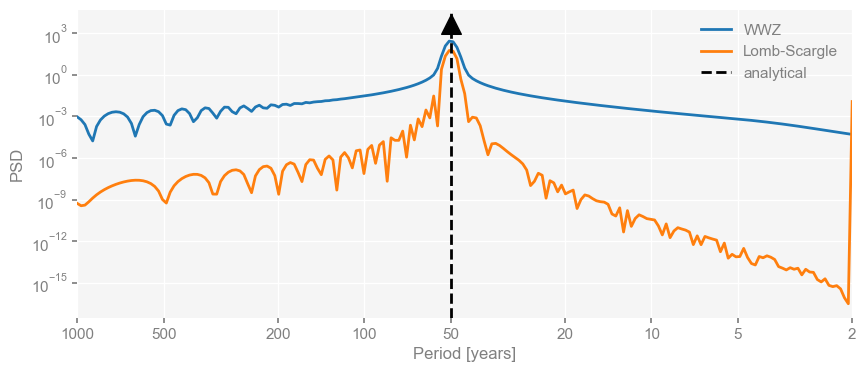

CPU times: user 678 ms, sys: 81.1 ms, total: 759 ms
Wall time: 894 ms


In [4]:
%%time
# compute and plot spectrum
psd_ls = ts.spectral(method = 'lomb_scargle')
psd_ls.plot(label='Lomb-Scargle',ax=ax)
#ax.set_ylim(0, 1)
ax.axvline(x=1/f0, color='k', ls='--', lw=2, label='analytical')
ax.scatter(x=1/f0, y=5000, marker='^', s=200, color='k')
ax.legend(frameon=False)
pyleo.showfig(fig)

We see that both methods are able to get a well-located peak, though it is narrower for Lomb-Scargle. We also see that the wavelet reproducing kernel creates a wider peak, and more spurious energy around it. LS is also considerably faster (about 25 times) than WWZ on this example. Note that WWZ's decay constant can we tweaked for a narrower bandwidth (by passing `settings = {'c': c_value}` in the function call), but this increases the number of spurious lobes at low frequencies (the usual bias-variance tradeoff). The total area under the curve is quite different, possibly due to the Welch Overlapping Segment Averaging (WOSA) operation, which patches the mean of various segments, and may bias the estimate of the total area uder the curve, which by Parseval's theorem should equal the signal's variance.

## Frequency Shift

Now let's try an instance where the frequency shifts midway through the timeseries:

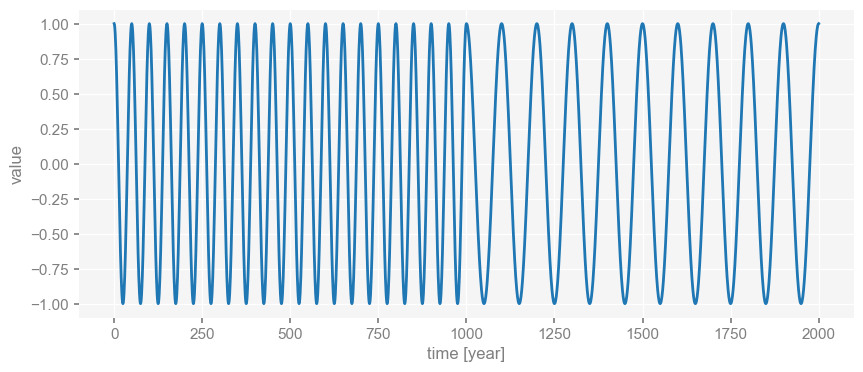

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='time [year]', ylabel='value'>)

In [5]:
time1 = np.arange(1000)
f1 = 1/50
signal1 = np.cos(2*np.pi*f1*time1)

time2 = np.arange(1000, 2001)
f2 = 1/100
signal2 = np.cos(2*np.pi*f2*time2)

signal = np.concatenate([signal1, signal2])
time = np.concatenate([time1, time2])

ts2 = pyleo.Series(time=time, value=signal,time_unit='year')
ts2.plot()

CPU times: user 1min 1s, sys: 233 ms, total: 1min 1s
Wall time: 12.3 s


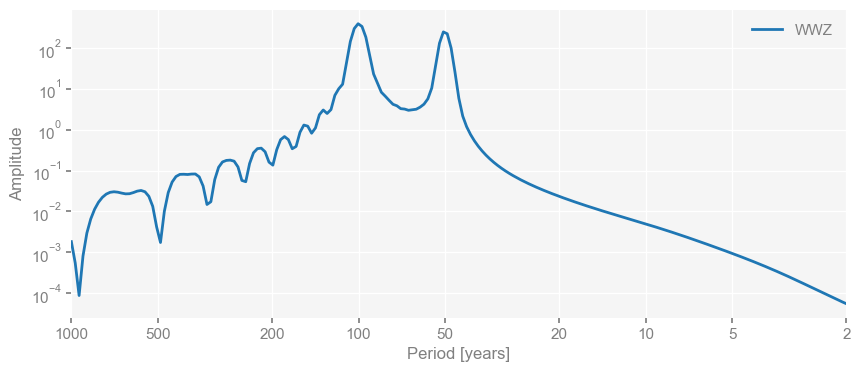

In [39]:
%%time
# compute and plot WWZ spectrum
psd_wwz2 = ts2.spectral(method = 'wwz')
fig, ax = psd_wwz2.plot(label='WWZ',mute=True)

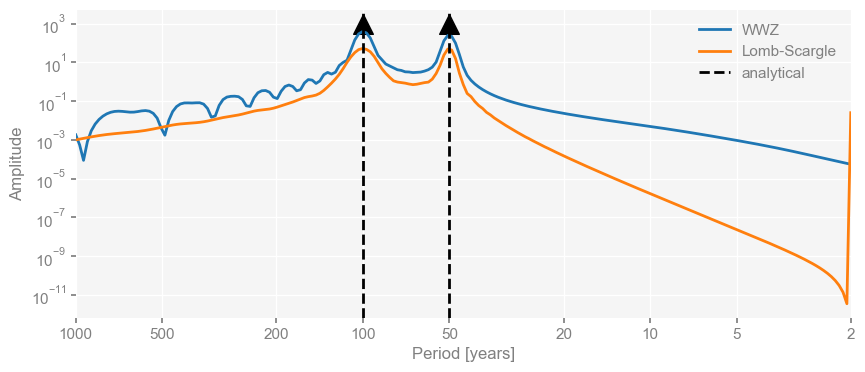

CPU times: user 408 ms, sys: 80.6 ms, total: 488 ms
Wall time: 489 ms


In [36]:
%%time
# compute and plot spectrum
psd_ls2 = ts2.spectral(method = 'lomb_scargle')
psd_ls2.plot(label='Lomb-Scargle',ax=ax)
#ax.set_ylim(0, 400)
ax.axvline(x=1/f1, color='k', ls='--', lw=2, label='analytical')
ax.scatter(x=1/f1, y=1e3, marker='^', s=200, color='k')
ax.axvline(x=1/f2, color='k', ls='--', lw=2 )
ax.scatter(x=1/f2, y=1e3, marker='^', s=200, color='k')
ax.legend(frameon=False)
pyleo.showfig(fig)

Now the two methods perform similarly, though WWZ is a little more noisy at low frequencies.

## Two close harmonics

The signal oscillates a a period of 50 years for the first half, 55 for the second. Can the peaks be distinguished?

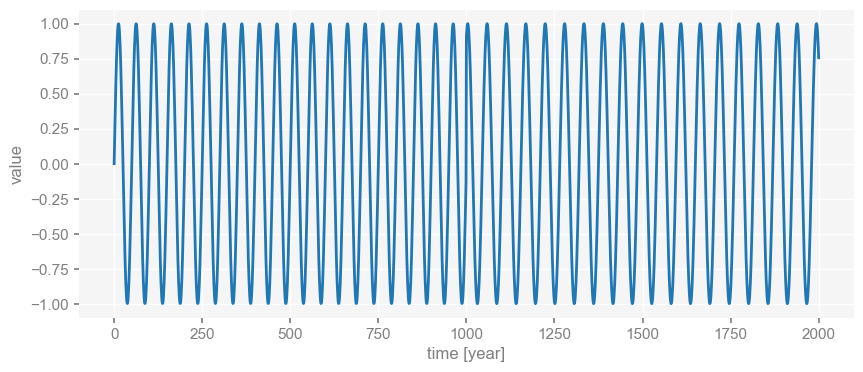

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='time [year]', ylabel='value'>)

In [15]:
time1 = np.arange(1000)
f1 = 1/50
signal1 = np.sin(2*np.pi*f1*time1)

time2 = np.arange(1000, 2001)
f2 = 1/55
signal2 = np.sin(2*np.pi*f2*time2)

signal = np.concatenate([signal1, signal2])
time = np.concatenate([time1, time2])

ts3 = pyleo.Series(time=time, value=signal,time_unit='year')
ts3.plot()

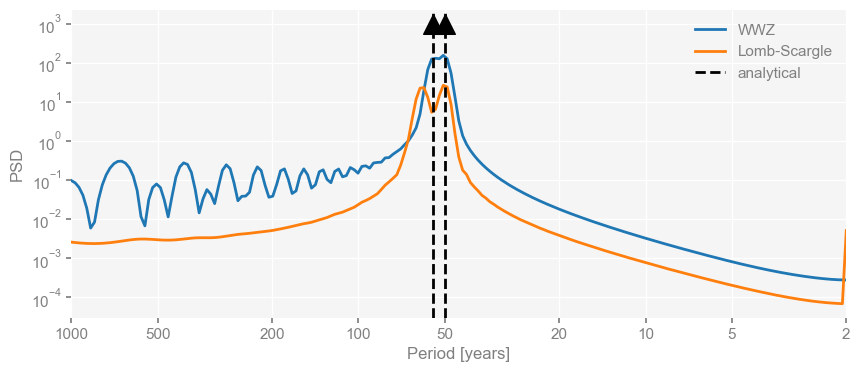

In [16]:
# compute and plot spectra
psd_wwz3 = ts3.spectral(method = 'wwz')
fig, ax = psd_wwz3.plot(label='WWZ',mute=True)
psd_ls3 = ts2.spectral(method = 'lomb_scargle')
psd_ls3.plot(label='Lomb-Scargle',ax=ax)

ax.axvline(x=1/f1, color='k', ls='--', lw=2, label='analytical')
ax.scatter(x=1/f1, y=1e3, marker='^', s=200, color='k')
ax.axvline(x=1/f2, color='k', ls='--', lw=2 )
ax.scatter(x=1/f2, y=1e3, marker='^', s=200, color='k')
ax.legend(frameon=False)
pyleo.showfig(fig)

Both methods struggle here: LS locates the 50y peak but mislabels the 55y peak closer to 60-70 years. In contrast, WWZ correctly locates both peaks, but its spectral resolution (defined in part by the decay constant $c$) is too coarse to separate them, so it appears as a single, broad peak. By tweaking the decay constant, one can get separate the eaks, but also get a lot of spurious wiggles at the low end. 

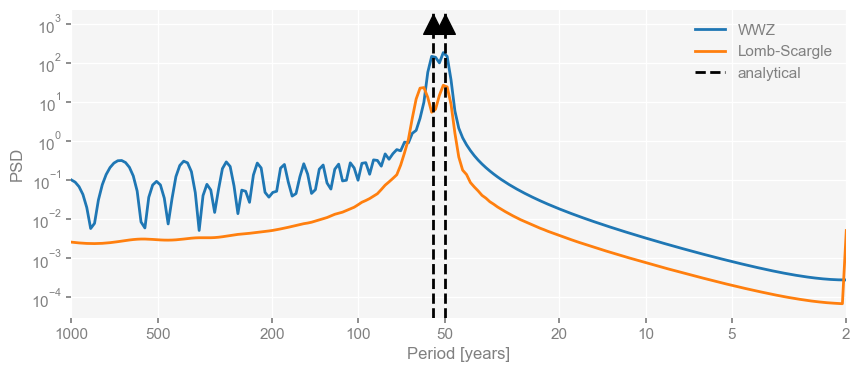

In [18]:
# compute and plot spectra
psd_wwz3 = ts3.spectral(method = 'wwz',settings={'c':5e-4})
fig, ax = psd_wwz3.plot(label='WWZ',mute=True)
psd_ls3 = ts2.spectral(method = 'lomb_scargle')
psd_ls3.plot(label='Lomb-Scargle',ax=ax)

ax.axvline(x=1/f1, color='k', ls='--', lw=2, label='analytical')
ax.scatter(x=1/f1, y=1e3, marker='^', s=200, color='k')
ax.axvline(x=1/f2, color='k', ls='--', lw=2 )
ax.scatter(x=1/f2, y=1e3, marker='^', s=200, color='k')
ax.legend(frameon=False)
pyleo.showfig(fig)

In conclusion, both WWZ and LS perform relatively well at harmonic analysis, though with the caveats noted above. For simple signals, LS is far more expeditious, but it can be fooled easily. 

## Colored noise

Next we benchmark the ability of each method to correctly estimate the continuum (aka "background") that joins peaks in any real-world signal. Following Kirchner (2005), the colored noise is constructed as:
    $x(t) = \Sigma_{k=1}^m (kf_0)^{-\alpha/2} \sin(\omega_0 t + \phi_k)$, so that the analytical PSD  follows a slope of $\alpha$ in a log-log plot.  Here, we work with fractal noise ($\alpha=1$), a scale-free stochastic process, and use the `colored_noise()` module to simulate this process.

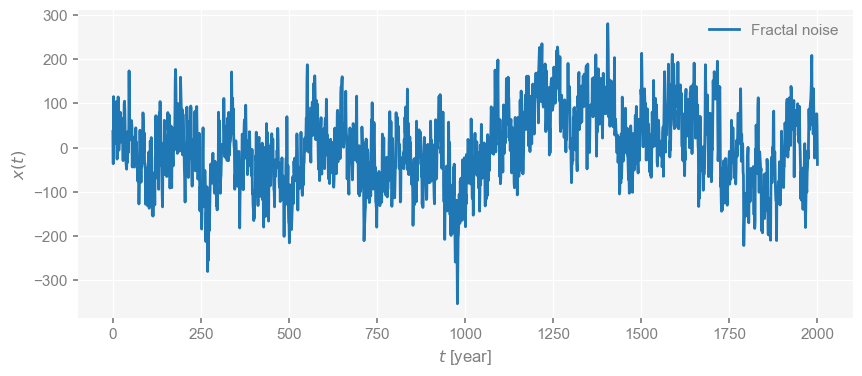

slope_wwz = -0.9790250634499171,slope_ideal = -1


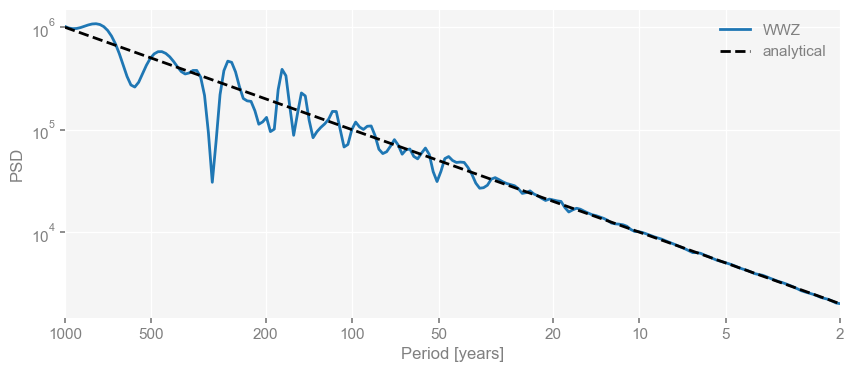

In [43]:
time = np.arange(2001)
alpha = 1
signal = pyleo.tsmodel.colored_noise(alpha, time, seed=2333) # initialize the random number generator for reproducibility
ts = pyleo.Series(time=t, value=signal,time_unit='year',label='Fractal noise',value_name=r'$x(t)$',time_name=r'$t$') 
ts.plot() 

Looks familiar? Yes, lots of paleoclimate timeseries look like that (see Huybers & Curry, 2005). Now let's estimate the spectrum and its slope.

slope_wwz = -0.9790250634499171,slope_ideal = -1


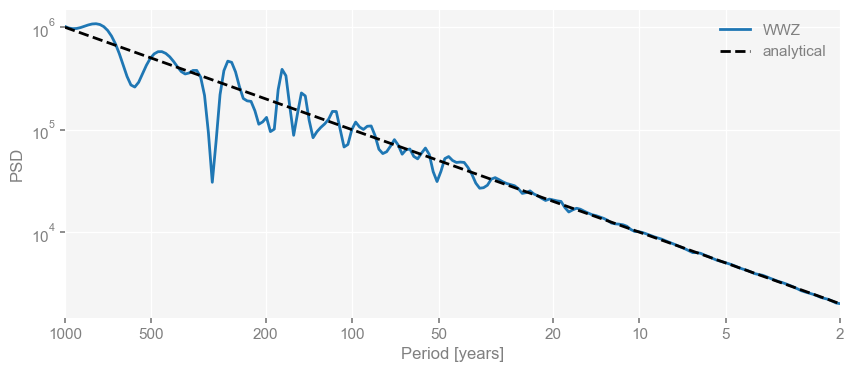

In [47]:
# WWZ estimate of spectrum and slope
psd_wwz = ts.spectral(method = 'wwz')
slope_wwz = -psd_wwz.beta_est()['beta']  # estimate the scaling expoment
# analytical PSD
psd_ideal = 0.5*psd_wwz.frequency**(-alpha)/(1/np.size(time))
print('slope_wwz = {},slope_ideal = {}'.format(slope_wwz,-alpha))
# plot
fig, ax = psd_wwz.plot(label='WWZ',mute=True)
ax.plot(1/psd_wwz.frequency, psd_ideal, color='k', ls='--', lw=2, label='analytical')
ax.legend(frameon=False)
pyleo.showfig(fig)         

We can see that WWZ estimates the slope to within 2% in this example. Not bad at all! The spectrum becomes more wiggly at low frequencies because there are fewer of those long cycles present in a finite sample like this, so the estimate is noisier. Now let's see what LS has to say.

slope_ls = -1.0555179570876396,slope_ideal = -1


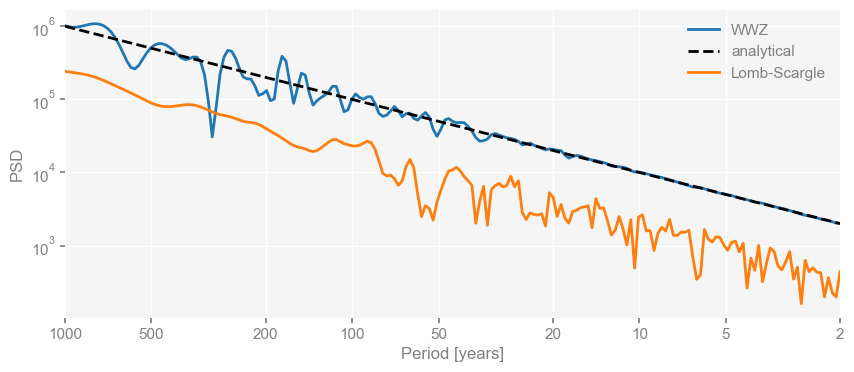

In [48]:
psd_ls = ts.spectral(method = 'lomb_scargle')
slope_ls = -psd_ls.beta_est()['beta']  # estimate the scaling expoment
print('slope_ls = {},slope_ideal = {}'.format(slope_ls,-alpha))
# plot
psd_ls.plot(ax=ax,label='Lomb-Scargle') 
ax.legend(frameon=False)
pyleo.showfig(fig)         

Interestingly, LS yields a very similar slope, but (unlike WWZ) the spectrum is smooth at low frequencies, and noisy at high frequencies. The normalization appears different, too, and off the theoretical spectrum by about a factor of 5, possibly because of WOSA.

## Colored noise with a regime break

We now explore a similar situation, but now the process is characterized by two distinct slopes (as in Zhu et al 2013). 

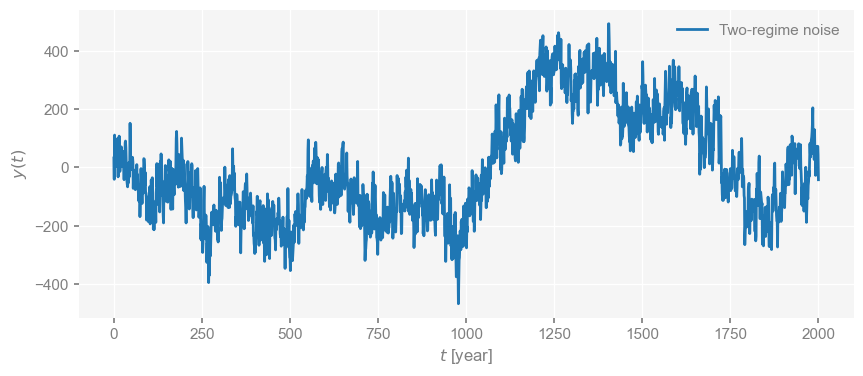

CPU times: user 291 ms, sys: 25.9 ms, total: 317 ms
Wall time: 317 ms


(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='$t$ [year]', ylabel='$y(t)$'>)

In [49]:
%%time
time = np.arange(2001)
signal = pyleo.tsmodel.colored_noise_2regimes(1, 2, 1/100, time, seed=2333) # simulate process
ts = pyleo.Series(time=t, value=signal,time_unit='year',label='Two-regime noise',value_name=r'$y(t)$',time_name=r'$t$') 
ts.plot() 

Again, let's use WWZ to compute its spectrum and estimate the spectral exponents. 

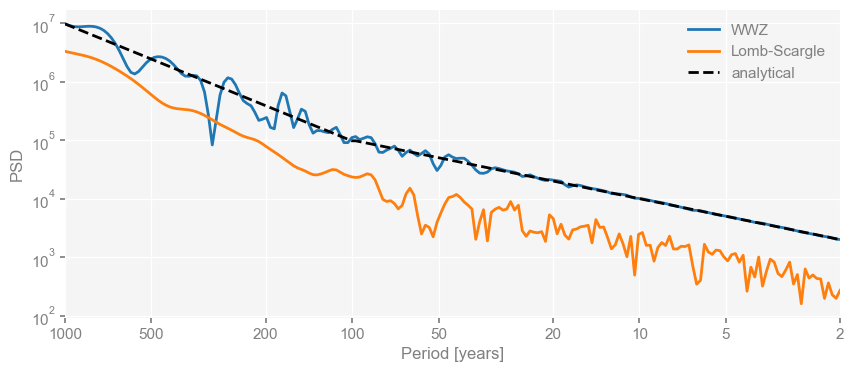

In [54]:
psd_wwz = ts.spectral(method = 'wwz')
freq = psd_wwz.frequency
psd_ls  = ts.spectral(method = 'lomb_scargle')

# generate analytical spectrum
psd_ideal_ref1 = 0.5*freq**(-1)/(1/np.size(time))
mask1 = freq>=1/100
mask2 = freq<1/100
psd_ideal_ref2 = 0.5*freq**(-2)/(1/np.size(time))
s = psd_ideal_ref2[mask2][-1] / psd_ideal_ref1[mask1][0]
psd_ideal_ref2 = psd_ideal_ref2 / s
psd_ideal = np.concatenate([psd_ideal_ref2[mask2], psd_ideal_ref1[mask1]])

# plot
fig, ax = psd_wwz.plot(label='WWZ',mute=True)
psd_ls.plot(ax=ax,label='Lomb-Scargle')
ax.plot(1/psd_wwz.frequency, psd_ideal, color='k', ls='--', lw=2, label='analytical')
ax.legend(frameon=False)
pyleo.showfig(fig)     

Same conclusion as before. 

## Adding white noise

Spectral analysis is a linear operation, so adding white noise (flat spectrum) should not affect the peak(s) of the signal with single or two constant frequencies. However, the white noise can affect the slope of a colored signal. As the signal to noise ratio (SNR), the mixed signal will become flatter in the log-log plot.

Assume that SNR=1, i.e., the variance of signal is equal to that of the white noise, then due to Parseval's theorem that variance of the signal equals to the integration of the PSD over infinite frequency interval, and that the colored noise is generated over a certain frequency interval from the Rayleigh frequency $f_R = 1/n$ ($n$ being the length of the signal) to the Nyquist frequency $f_{N} = 1/2$, we have
$$
\int_{1/n}^{1/2} S(f) df = \text{var}(X(t)) = \text{var}(\text{w.n.}) = \int_{1/n}^{1/2} S(f_{\text{w.n.}}) df
$$, which means that the integrated area of the signal in the frequency domain should be equal to that of the white noise.

On a log-log plot, adding the same amount of the energy at different frequencies to a colored noise will eventually result in a curve, with the lower-frequency end getting closer to the orignal slope but the higher-frequency end becoming flatter. Physically speaking, the white noise makes the higher-frequency signal more difficult to detect.

To get the analytical PSD in this case, we will first calculate the energy level of the white noise based on SNR and Parseval's theorem, and then add that part to the analytical PSD of the colored noise.
Other cases can be handled in a similar way.

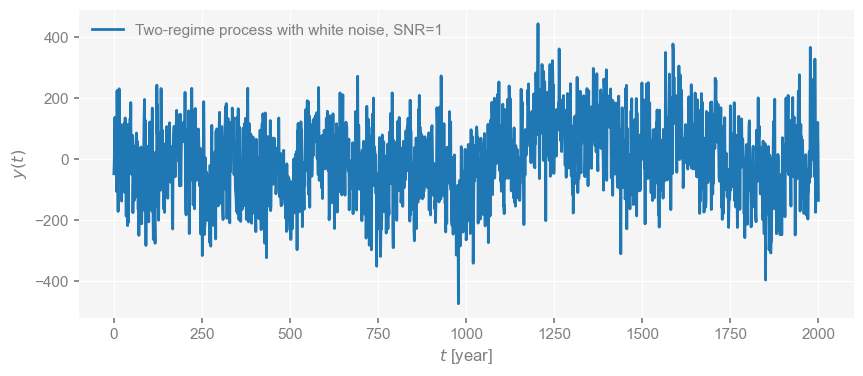

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='$t$ [year]', ylabel='$y(t)$'>)

In [60]:
SNR = 1
np.random.seed(2333)
time = np.arange(2001)
signal = pyleo.tsmodel.colored_noise(alpha, time, seed=2333) # initialize the random number generator for reproducibility
sig_var = np.var(signal)
noise_var = sig_var / SNR
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal))
signal_noise = signal + white_noise
ts = pyleo.Series(time=t, value=signal_noise,time_unit='year',label='Two-regime process with white noise, SNR=1',value_name=r'$y(t)$',time_name=r'$t$') 
ts.plot() 

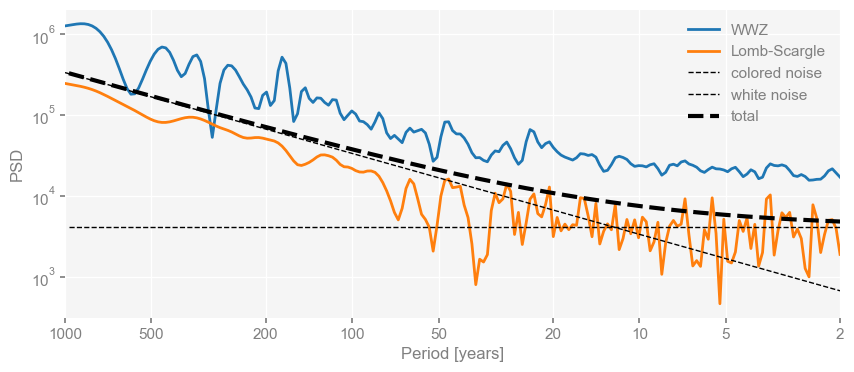

In [62]:
# empirical PSDs, two ways
#psd_wwz = ts.spectral(method = 'wwz')
psd_ls  = ts.spectral(method = 'lomb_scargle')
freq = psd_wwz.frequency

fig, ax = psd_wwz.plot(label='WWZ',mute=True)
psd_ls.plot(ax=ax,label='Lomb-Scargle')

# analytical PSD for colored noise
psd_ideal = 0.5/3*freq**(-1)/(1/np.size(time))
ax.plot(1/freq, psd_ideal, color='k', ls='--', lw=1, label='colored noise')

# analytical PSD for white noise
area = np.trapz(psd_ideal[1:], x=freq[1:]) # the 1st is inf due to zero-frequency
psd_wn = np.empty(np.size(freq[1:]))
psd_wn_value = area / (1/2-1/np.size(time))
psd_wn[:] = psd_wn_value
ax.plot(1/freq[1:], psd_wn, color='k', ls='--', lw=1, label='white noise')

# analytical PSD for the total
psd_ana = psd_ideal[1:] + psd_wn
ax.plot(1/freq[1:], psd_ana, color='k', ls='--', lw=3, label='total')
ax.legend(frameon=False)
pyleo.showfig(fig)     

The two methods perform quite similarly again, though with a persistent offset in the total variance (area under the curve). Arguably, WWZ does a slightly better job of espousing the analytical curve, though this is not very clear-cut. Overall, the two methods perform very similarly in the estimate of the backgroun and peaks, and LS is at least one order of magnitude more computationally efficient. On the other hand, one advantage of WWZ is that it gives the total wavelet spectrum, which is more appropriate to detecting non-stationary features like frequency shits or modulation:

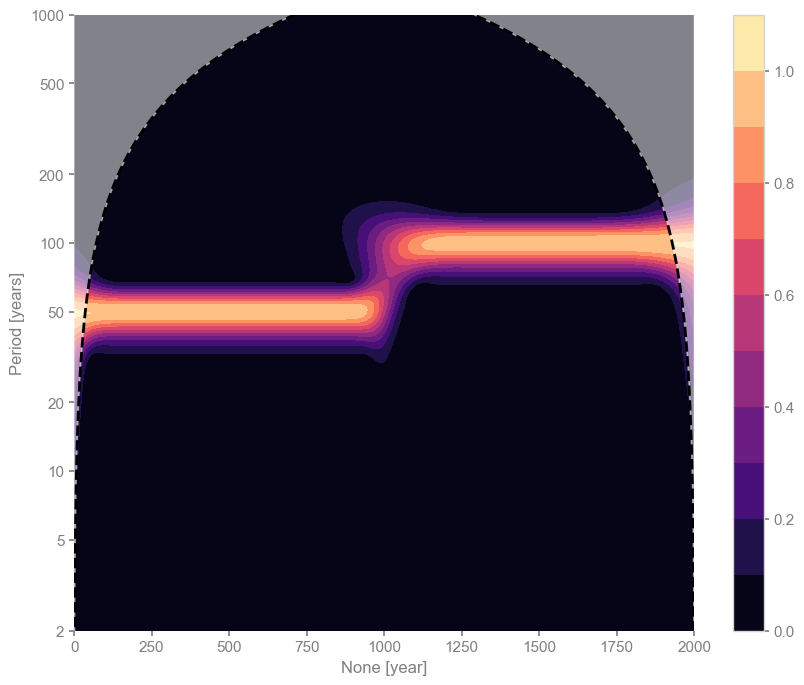

In [6]:
scal = ts2.wavelet()
fig,ax=scal.plot()

In summary, for spectral analysis LS is the most efficient choice, though it can mislabeled frequencies (watch out for that if you expect two close harmonics, like the 19 and 23 kyr precessional cycles, in your signal). WWZ is perhaps a safer choice in that context, though it is slow, and the choice of decay constant is somewhat subjective, and may need to be adjusted to detect features of interest. WWZ produces, for the same computational price, and entire scalogram, which allows to investigate nonstationary behavior.

## References
- Foster, G. (1996), Wavelets for period analysis of unevenly sampled time series, Astron. Jour., 112, 1709, doi:10.1086/118137.
- Kirchner, J. W. (2005), Aliasing in $1/f^{\alpha}$ noise spectra: Origins, consequences, and remedies, Physical Review E, 71(6), 066,110–, doi:10.1103/PhysRevE.71.066110.
- Lomb, N. R. (1976). Least-squares frequency analysis of unequally spaced data. Astrophysics and Space Science 39, 447-462.
- Scargle, J. D. (1982). Studies in astronomical time series analysis. II. Statistical aspects of spectral analyis of unvenly spaced data. The Astrophysical Journal, 263(2), 835-853.
- Scargle, J. D. (1989). Studies in astronomical time series analysis. III. Fourier transforms, aotocorrelation functions, and cross-correlation functions of unevenly-spaced data. . The Astrophysical Journal, 343(2), 874-887.
- Zhu, F., J. Emile-Geay, N. P. McKay, G. J. Hakim, D. Khider, T. R. Ault, E. J. Steig, S. Dee, and J. W. Kirchner (2019), Climate models can correctly simulate the continuum of global-average temperature variability, Proceedings of the National Academy of Sciences, 116(18), 8728, doi:10.1073/pnas.1809959116.